In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
pickle_file = 'smoothing_results.pkl'
with open(pickle_file, 'rb') as handle:
    smoothing_dict = pickle.load(handle)

In [3]:
inbreast_l=list(range(11))
cmmd_l=list(range(11))
stge_l=list(range(11))
jarv_l=list(range(11))
bcdr_l=list(range(11))
avg_l=list(range(11))
for k,v in smoothing_dict.items():
    inbreast_l[int(k)] = v['inbreast']
    cmmd_l[int(k)] = v['cmmd']
    stge_l[int(k)] = v['stge']
    jarv_l[int(k)] = v['jarv']
    bcdr_l[int(k)] = v['bcdr']
    avg_l[int(k)] = v['average']

In [4]:
avg_l

[0.9213852873108968,
 0.9095186184660122,
 0.9178065263248676,
 0.9316000284900474,
 0.9310739379095633,
 0.9175549218762808,
 0.926942274210889,
 0.9261165084065016,
 0.9319753262264114,
 0.9325461649141185,
 0.9244917062220892]

In [6]:
metadata=np.array([inbreast_l, cmmd_l, stge_l, jarv_l, bcdr_l])

In [11]:
error=np.std(metadata, axis=0)

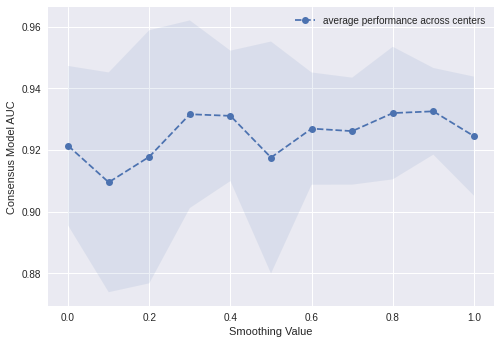

In [18]:
steps = list(range(11))
steps = [s/10 for s in steps]
plt.plot(steps, avg_l,'--o', label='average performance across centers')
plt.fill_between(steps, avg_l-error*0.8, avg_l+error*0.8, alpha=0.1)
plt.legend()
plt.xlabel('Smoothing Value')
plt.ylabel('Consensus Model AUC')
plt.savefig('./SmoothingCurve_Errorbars.pdf')

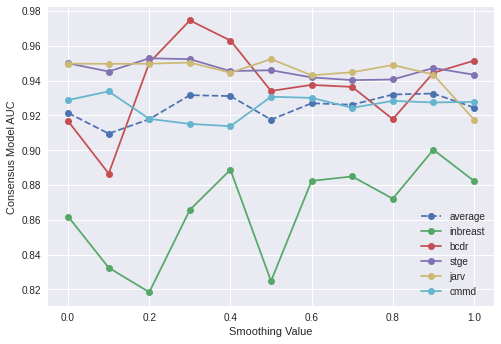

In [5]:
steps = list(range(11))
steps = [s/10 for s in steps]
plt.plot(steps, avg_l,'--o', label='average')
plt.plot(steps, inbreast_l,'-o', label='inbreast')
plt.plot(steps, bcdr_l,'-o', label='bcdr')
plt.plot(steps, stge_l,'-o', label='stge')
plt.plot(steps, jarv_l,'-o', label='jarv')
plt.plot(steps, cmmd_l,'-o', label='cmmd')
plt.legend()
plt.xlabel('Smoothing Value')
plt.ylabel('Consensus Model AUC')
plt.savefig('./SmoothingCurve.pdf')